# Hands-on 01: Tutorial de apresentação e uso básico do Python

# Objetivos 
- Apresentar vantagens de usar o Python3;
- Apresentar onde encontrar informações sobre o Python 3;
- Apresentar operações básicas com o Python 3.

# Python: o que é, vantagens e desvantagens
Python é uma linguagem de programação de alto nível, interpretada (C++, por sua vez, é compilada), lançada em 1991 por [Guido Van Rossum](https://pt.wikipedia.org/wiki/Guido_van_Rossum). É conhecida por ser _open source_, de fácil implementação e fácil aprendizado, além de ser multiparadigma: abrange a programação orientada a objetos, programação funcional e imperativa (para saber mais sobre paradigmas de programação, clique [aqui](https://fit.faccat.br/~guto/artigos/Artigo_Paradigmas_de_Programacao.pdf)).

## Vantagens
- Suporta mútliplos sistemas e plataformas;
- Códigos fáceis de implementar e entender;
- Suporta orientação a objetos;
- Tipagem dinâmica: pode ser visto como desvantagem para alguns, já que não se determina o tipo de cada variável, porém economiza tempo e esforço por evitar erros de atribuição que dificultam a execução do código;
- Ampla biblioteca padrão;
- Possui _frameworks_ (conceito semelhante ao de "biblioteca"), que serão expostos adiante.

## Desvantagens
- Não é uma linguagem muito boa para desenvolvimento _mobile_;
- O gerenciamento de memória não é tão eficiente como o de C++, por exemplo;
- Por vezes é considerada lenta;
- Não é aconselhável para projetos que requisitem muita memória.

## Frameworks interessantes

Frameworks podem ser vistos como um conjunto de ferramentas que lidam com detalhes de baixo nível e permite que o desenvolvedor poupe seu tempo utilizando apenas os recursos de alto nível. Embora essa pareça com a definição de bibliotecas, uma maneira fácil de diferenciar os dois conceitos é: você coloca bibliotecas em seus códigos e seus códigos em frameworks. Como alguns exemplos em Python, temos:

- **Django (The Web Framework for perfectionists with deadlines):** é amplamente utilizado para desenvolver aplicações Web robustas com facilidade e rapidez. Sites famosos que utilizaram Django para seu desenvolvimento são: YouTube, Dropbox, Quora, Google [[Fonte]](https://www.shuup.com/blog/25-of-the-most-popular-python-and-django-websites/).

![fig_django](../FIGS/HD_01_PYTHON/django.jpg)

- **PyQt:** desenvolvimento de aplicações com interfaces gráficas (GUI).

![fig_pyqt](../FIGS/HD_01_PYTHON/pyqt.jpg)

- **Kivy:** desenvolvimento de interfaces gráficas, abrangendo mais plataformas que o PyQt

![fig_kivy](../FIGS/HD_01_PYTHON/kivy.png)


## Bibliotecas mais utilizadas

- **Matplotlib:** plotagem de gráficos 2D com interatividade e diversos formatos.

![fig_matplotlib](../FIGS/HD_01_PYTHON/matplotlib.png)

- **Numpy:** criação de arrays N-dimensionais, ferramentas algébricas, números aleatórios e Transformada de Fourier.

![fig_numpy](../FIGS/HD_01_PYTHON/numpy.jpg)

- **SciPy:** biblioteca maior que engloba ferramentas importantes para cientistas, matemáticos e engenheiros. Numpy e Matplotlib estão inclusas na SciPy. Veja mais no site oficial da SciPy: https://www.scipy.org/ .

![fig_scipy](../FIGS/HD_01_PYTHON/scipylogo.png)


## Onde achar material sobre as bibliotecas 


**PyScience-Brasil** (http://pyscience-brasil.wikidot.com/): portal colaborativo cujo objetivo é gerar documentação para as bibliotecas desenvolvidas na linguagem Python que podem ser utilizadas em estudos e projetos científicos.

**Documentação do Numpy and Scipy:** https://docs.scipy.org/doc/

**Documentação do Matplotlib:** https://matplotlib.org/

**Obs.:** Geralmente, uma pesquisa no Google sobre o comando ou _o que_ você quer fazer com o Python te leva a documentação acima ou a algum fórum que explica comandos e bibliotecas necessárias a realizar oq ue você necessita! 



# Prática 1: Tempo de execução com uso de laço e com operação matricial

Nessa prática, vamos escrever um código para criação de um mapa de cobertura de dois roteadores sem fio. A ideia é calcular a potência recebida em dBm para pontos equidistantes de 5 em 5 metros em uma área de cobertura de 200 por 200 m. A seguintes especificações devem ser obedecidas:

1. Os roteadores devem ser posicionados no meio do grid em relação a abscissa. Em relação ao eixo das ordenadas, o primeiro e segundo roteador deve ficar a 20% e a 80% da dimensão vertical da área de cobertura, respectivamente
2. A potência de transmissão do roteador deve ser $P_T$ = 1 W
3. Considere somente perda de percurso como manifestação de canal. Assim, a potência recebida ($P_R$) pode ser calculada como $P_R = P_T/x^4$, sendo $x$ a distância entre o roteador e o ponto de recepção.

A figura a seguir ilustra o sistema.

![fig_slide30](../FIGS/HD_01_PYTHON/slide30.png)

Vamos escrever o código com e sem laço FOR, almejando comparar o desempenho do Python perante laços FOR e o uso eficiente de matrizes.

**Passo 01:** abra este arquivo (**h01_python.ipynb**) com o Jupyter Notebook. Para isso, abre um terminal e digite:

cd ~/DCO2004_2022/

jupyter notebook notebooks/h01_python.ipynb 

Continue do **Passo 02** em diante no browser que o comando acima abriu.

**Passo 02:** Inspecione e execute in line (via Jupyter Notebook, apertando **Shift+Enter**):

Tempo de execução com laço FOR: 0.265625


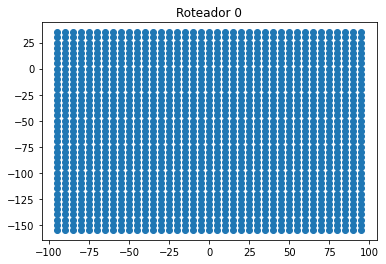

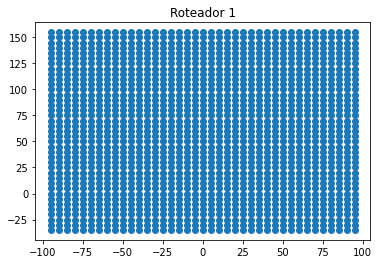

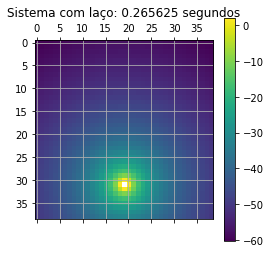

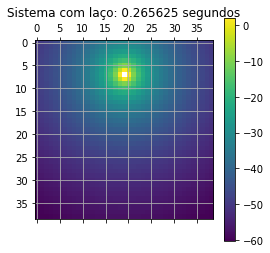

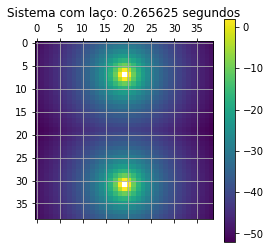

In [1]:
import warnings                        # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore')      # Método para suprimir os avisos de exceções 
# Ex.: divisões por zero, que neste exemplo, não é um problema.

import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
# Warning for Python version before 3.8: See https://stackoverflow.com/questions/58569361/attributeerror-module-time-has-no-attribute-clock-in-python-3-8
# start_time = time.clock()            # Primeira medição de tempo: inicia a contagem before Python 3.8 version
start_time = time.process_time()       # Primeira medição de tempo: inicia a contagem for Python 3.8 version
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 200                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos 
# nl não é do tipo inteiro, e precisa ser na definição de px e py a seguir.
# Sugestão: comente a linha abaixo e observe a exceção que o interpretador/Python irá levantar
NL = int(nl)                       
px = np.ndarray([NL,NL],dtype=complex) # Criação de matriz de complexos (não inicializada)
py = np.ndarray([NL,NL],dtype=complex) # Criação de matriz de complexos (não inicializada)
# Montagem da Matriz com posição de cada ponto do grid (posição relativa ao canto inferior direito)
for i in range(NL):                    # Laço de 0 até NL-1
    for j in range(NL):                # Laço de 0 até NL-1
        px[i,j] = dPasso + j*dPasso    # j é a variável do iterador, sem relação com o complexo
        py[j,i] = px[i,j]

# Criação de matrizes de posição e potência recebida (não inicializadas)
pbs0 = np.ndarray([NL,NL], dtype=complex)
pbs1 = np.ndarray([NL,NL], dtype=complex)
pl0  = np.ndarray([NL,NL])
pl1  = np.ndarray([NL,NL])
plf  = np.ndarray([NL,NL])

for i in range(NL):
    for j in range(NL):
# Matrizes com posição de cada ponto do grid relativa a cada roteador
        pbs0[i,j] = px[i,j]+ 1j*py[i,j] - ( dDim/2 + 0.8*dDim*1j)
        pbs1[i,j] = px[i,j]+ 1j*py[i,j] - ( dDim/2 + 0.2*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
        pl0[i,j]=  10*np.log10(1/(np.absolute(pbs0[i,j])**4)/0.001)
        pl1[i,j]=  10*np.log10(1/(np.absolute(pbs1[i,j])**4)/0.001)
# Cálculo da melhor potência em cada ponto do grid
        plf[i,j] = max(pl0[i,j],pl1[i,j])               
# Fim dos laços
# Medição de tempo de execução
# stop_time = time.clock()            # Medição de tempo de execução: contagem before Python 3.8 version
stop_time = time.process_time()       # Medição de tempo de execução contagem for Python 3.8 version
# A criação das matrizes e dos laços são a parte de interesse do algoritmo
# por isso a medição se encerra antes de fazermos a plotagem, que é meramente para visualização
tempo_de_execucao = stop_time - start_time
# Mostra tempo de execução na tela
print("Tempo de execução com laço FOR: "+str(tempo_de_execucao))

from matplotlib import pyplot as plt   # Importa pyplot, que possui as funções essenciais para plotagem
plt.scatter(pbs0.real,pbs0.imag)       # Monta o plot do mapa de pontos do reteador 0
plt.title("Roteador 0")                # Configura o título do plot
plt.show()                             # Mostra o plot do mapa de pontos
plt.scatter(pbs1.real,pbs1.imag)       # Monta o plot do mapa de pontos do reteador 1
plt.title("Roteador 1")                # Configura o título do plot
plt.matshow(pl0)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.matshow(pl1)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
# Monta mapa de cores de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.matshow(plf)                 
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.show()                             # Mostra todos os plots montados

**A execução do código resulta em:**

1. Mostrar o tempo necessário para executar o código (excluindo o processamento gráfico);
2. Gráficos com posição dos pontos do grid para os dois roteadores (roteador 0 e roteador 1). Note que o ponto (0,0) de cada roteador (de cada gráfico), i.e., seu posicionamento, é diferente. No roteador 0, o ponto (0,0) está a 80% do máximo valor vertical e, no roteador 1, o ponto (0,0) está a 20% do máximo, como espeficado na prática.
3. Gráficos com o mapa de cobertura (potência recebida em cada ponto do grid) para cada roteador separadamente; e
4. Gráfico com o mapa de cobertura para melhor situação possível, i.e., a melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores).


**Analise o código com cuidado. Tente compreender a modelagem e a sintaxe usada. Discuta com os colegas ou com o professor. Faça um debug usando o Spyder.**

**Passo 03:** Agora vamos fazer o mesmo código anterior sem usar laço FOR. Execute in line (via Jupyter Notebook):

Tempo de execução sem laço FOR: 0.0


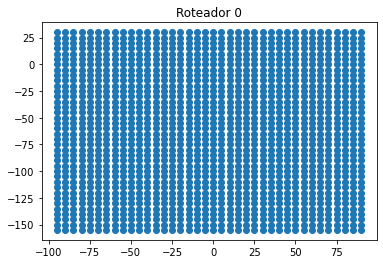

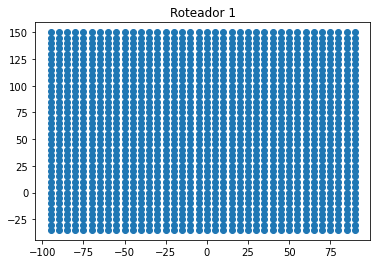

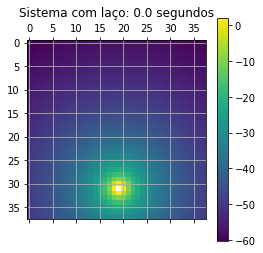

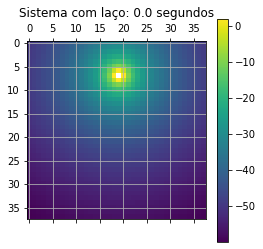

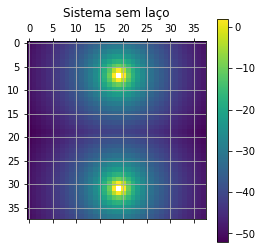

In [2]:
import warnings                        # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore')      # Método para suprimir os avisos de exceções 
# Ex.: divisões por zero, que neste exemplo, não é um problema.

import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
# Warning for Python version before 3.8: 
# start_time = time.clock()            # Primeira medição de tempo: inicia a contagem before Python 3.8 version
start_time = time.process_time()       # Primeira medição de tempo: inicia a contagem for Python 3.8 version
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 200                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos 

x= np.arange(dPasso,dDim-dPasso,dPasso)
y=np.arange(dPasso,dDim-dPasso,dPasso)
X,Y = np.meshgrid(x,y)

# Matrizes com posição de cada ponto do grid relativa a cada roteador
pbs0 = X + 1j*Y - (dDim/2 + 0.8*dDim*1j)
pbs1 = X + 1j*Y - (dDim/2 + 0.2*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
pl0 = 10*np.log10(1/(np.absolute(pbs0)**4)/0.001)
pl1 = 10*np.log10(1/(np.absolute(pbs1)**4)/0.001)
plf = np.maximum(pl0,pl1)

# Medição de tempo de execução
# stop_time = time.clock()            # Medição de tempo de execução: contagem before Python 3.8 version
stop_time = time.process_time()       # Medição de tempo de execução contagem for Python 3.8 version
# A criação das matrizes e dos laços são a parte de interesse do algoritmo
# por isso a medição se encerra antes de fazermos a plotagem, que é meramente para visualização
tempo_de_execucao = stop_time - start_time
# Mostra tempo de execução na tela
print("Tempo de execução sem laço FOR: "+str(tempo_de_execucao))

from matplotlib import pyplot as plt   # Importa pyplot, que possui as funções essenciais para plotagem
plt.scatter(pbs0.real,pbs0.imag)       # Monta o plot do mapa de pontos do reteador 0
plt.title("Roteador 0")                # Configura o título do plot
plt.show()                             # Mostra o plot do mapa de pontos
plt.scatter(pbs1.real,pbs1.imag)       # Monta o plot do mapa de pontos do reteador 1
plt.title("Roteador 1")                # Configura o título do plot
plt.matshow(pl0)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
plt.matshow(pl1)                       # Monta mapa de cores (colormap) para potência recebida do roteador 0
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de cores (colormap) para potência recebida do roteador 0, incluindo tempo de execução
plt.title("Sistema com laço: "+ str(tempo_de_execucao)+ " segundos",y=1.1)
# Monta mapa de cores de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.matshow(plf)                 
plt.grid()                             # Adiciona as linhas horizontais e verticais
plt.colorbar()                         # Adiciona a barra vertical com escala numérica das cores
# Título do mapa de melhor potência recebida em cada ponto do grid (melhor entre os dois roteadores)
plt.title("Sistema sem laço",y=1.1)
plt.show()   

Além do código ser bem menor (em termos de número de linhas), se percebe uma difereça significativa de tempo de execução sem o uso do laço FOR.

Essa diferença de desempenho é muito mais acentuada quanto maior é o tamanho do laço FOR. 

**Passo 04:** Para exemplificar, vamos executar os códigos para um grid de tamanho 5000. Execute in line (via Jupyter Notebook):

In [3]:
import warnings                        # Método para suprimir os avisos de exceções 
warnings.filterwarnings('ignore')      # Método para suprimir os avisos de exceções 
# Ex.: divisões por zero, que neste exemplo, não é um problema.

import time                            # Importa a biblioteca para as funções relacionadas a contagem de tempo
# Warning for Python version before 3.8: 
# start_time_mat = time.clock()            # Primeira medição de tempo: inicia a contagem before Python 3.8 version
start_time_mat = time.process_time()       # Primeira medição de tempo: inicia a contagem for Python 3.8 version
dPasso = 5                             # Resolução do grid: distância entre um passo e outro
dDim = 5000                             # Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos 

x= np.arange(dPasso,dDim-dPasso,dPasso)
y=np.arange(dPasso,dDim-dPasso,dPasso)
X,Y = np.meshgrid(x,y)

# Matrizes com posição de cada ponto do grid relativa a cada roteador
pbs0 = X + 1j*Y - (dDim/2 + 0.8*dDim*1j)
pbs1 = X + 1j*Y - (dDim/2 + 0.2*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
pl0 = 10*np.log10(1/(np.absolute(pbs0)**4)/0.001)
pl1 = 10*np.log10(1/(np.absolute(pbs1)**4)/0.001)
plf = np.maximum(pl0,pl1)
# Medição de tempo de execução sem laço FOR
# Medição de tempo de execução
# stop_time_mat = time.clock()            # Medição de tempo de execução: contagem before Python 3.8 version
stop_time_mat = time.process_time()       # Medição de tempo de execução contagem for Python 3.8 version
tempo_de_execucao_mat = stop_time_mat - start_time_mat

# Abertura de timer para o laço FOR
# Warning for Python version before 3.8: 
# start_time_for = time.clock()            # Primeira medição de tempo: inicia a contagem before Python 3.8 version
start_time_for = time.process_time()       # Primeira medição de tempo: inicia a contagem for Python 3.8 version

nl = (dDim-2*dPasso)/dPasso + 1        # Número de pontos na medição
import numpy as np                     # Importa biblioteca para cálculos numéricos 
# nl não é do tipo inteiro, e precisa ser na definição de px e py a seguir.
# Sugestão: comente a linha abaixo e observe a exceção que o interpretador/Python irá levantar
NL = int(nl)                       
px = np.ndarray([NL,NL],dtype=complex) # Criação de matriz de complexos (não inicializada)
py = np.ndarray([NL,NL],dtype=complex) # Criação de matriz de complexos (não inicializada)
# Montagem da Matriz com posição de cada ponto do grid (posição relativa ao canto inferior direito)
for i in range(NL):                    # Laço de 0 até NL-1
    for j in range(NL):                # Laço de 0 até NL-1
        px[i,j] = dPasso + j*dPasso    # j é a variável do iterador, sem relação com o complexo
        py[j,i] = px[i,j]

# Criação de matrizes de posição e potência recebida (não inicializadas)
pbs0 = np.ndarray([NL,NL], dtype=complex)
pbs1 = np.ndarray([NL,NL], dtype=complex)
pl0  = np.ndarray([NL,NL])
pl1  = np.ndarray([NL,NL])
plf  = np.ndarray([NL,NL])

for i in range(NL):
    for j in range(NL):
# Matrizes com posição de cada ponto do grid relativa a cada roteador
        pbs0[i,j] = px[i,j]+ 1j*py[i,j] - ( dDim/2 + 0.8*dDim*1j)
        pbs1[i,j] = px[i,j]+ 1j*py[i,j] - ( dDim/2 + 0.2*dDim*1j)
# Cálculo da potência recebida em cada ponto do grid recebida de cada roteador
        pl0[i,j]=  10*np.log10(1/(np.absolute(pbs0[i,j])**4)/0.001)
        pl1[i,j]=  10*np.log10(1/(np.absolute(pbs1[i,j])**4)/0.001)
# Cálculo da melhor potência em cada ponto do grid
        plf[i,j] = max(pl0[i,j],pl1[i,j])               
# Fim dos laços

# Medição de tempo de execução com laço FOR
# stop_time_for = time.clock()            # Medição de tempo de execução: contagem before Python 3.8 version
stop_time_for = time.process_time()       # Medição de tempo de execução contagem for Python 3.8 version
tempo_de_execucao_for = stop_time_for - start_time_for
# Imprimir mensagens na tela
print("Tempo de execução sem laço FOR: "+str(tempo_de_execucao_mat))
print("Tempo de execução com laço FOR: "+str(tempo_de_execucao_for))
dif = 100*(tempo_de_execucao_mat-tempo_de_execucao_for)/tempo_de_execucao_mat
print("Diferença percentual de tempo: "+str(dif)+"%")

Tempo de execução sem laço FOR: 0.140625
Tempo de execução com laço FOR: 9.75
Diferença percentual de tempo: -6833.333333333333%


**A diferença percentual é gigantesca e pode fazer toda diferença em projeto grandes que usem Python!!!**